# Case study: Titanic

Con las técnicas que hemos aprendido en estas sesiones, os propongo llevar a cabo un EDA (exploratory data analysis) de la información de los pasajeros de uno de los hundimientos de un barco más famosos de la hustoria. Analicemos la base de datos de titanic:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from plotnine import *
titanic = sns.load_dataset('titanic')

Empecemos viendo las primeras filas: `.head()`

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Descripción de las variables
* Survived: Sobrevivió (1) o no (0)
* Pclass: Viajaba en 1º 2º o 3º clase
* Name: Nombre
* Sex: Sexo
* Age: Edad
* SibSp: Número de hermanos o conyuges
* Parch: Número de padres e hijos
* Fare: Coste del billete
* Embarked: Puerto desde donde embarcó (C = Cherbourg, Q = Queenstown, S = Southampton)

En primer lugar vamos a quitar las variables repetidas y limpiar la base de datos:

In [3]:
titanic = titanic.drop(['pclass', 'who', 'deck', 'embarked'], axis=1)
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alive,alone
0,0,male,22.0,1,0,7.2500,Third,True,Southampton,no,False
1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,yes,False
2,1,female,26.0,0,0,7.9250,Third,False,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,First,False,Southampton,yes,False
4,0,male,35.0,0,0,8.0500,Third,True,Southampton,no,True


## ¿Hay datos faltantes?

In [4]:
titanic.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

__¿Cuantas personas sobrevivieron?__

In [5]:
titanic.groupby('alive')['alive'].count()

alive
no     549
yes    342
Name: alive, dtype: int64

<AxesSubplot:>

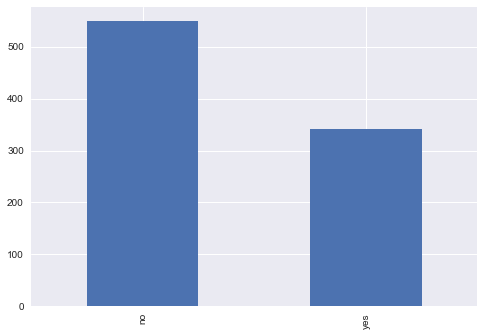

In [6]:
titanic['alive'].value_counts().plot(kind='bar')

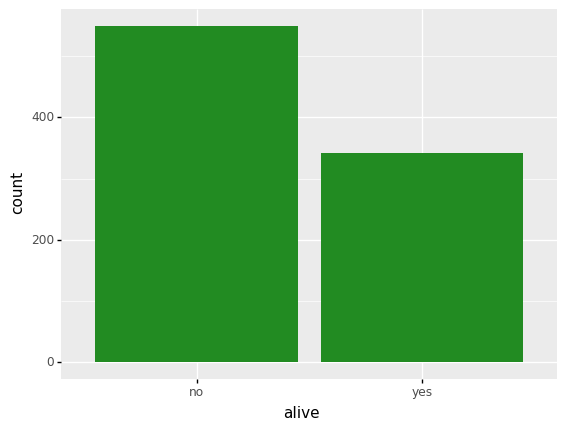

<ggplot: (97841795560)>

In [7]:
(ggplot(titanic, aes(x='alive')) + geom_bar(fill='forestgreen'))

__¿Cuantas personas de cada sexo había?__

In [8]:
titanic.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

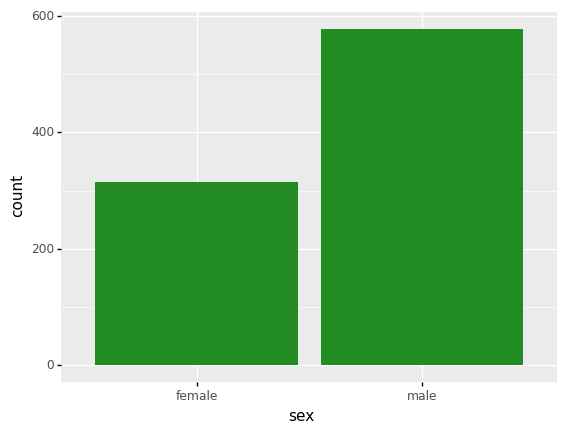

<ggplot: (97841835295)>

In [9]:
(ggplot(titanic, aes(x='sex')) + geom_bar(fill='forestgreen'))

__¿Cuantas personas de cada clase había?__

In [10]:
titanic.groupby('class')['class'].count()

class
First     216
Second    184
Third     491
Name: class, dtype: int64

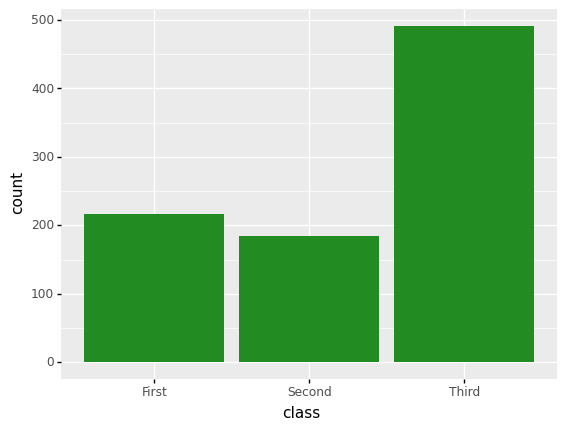

<ggplot: (97841801665)>

In [11]:
(ggplot(titanic, aes(x='class')) + geom_bar(fill='forestgreen'))

__¿Cómo se distribuyen las edades de los pasajeros?__

<AxesSubplot:>

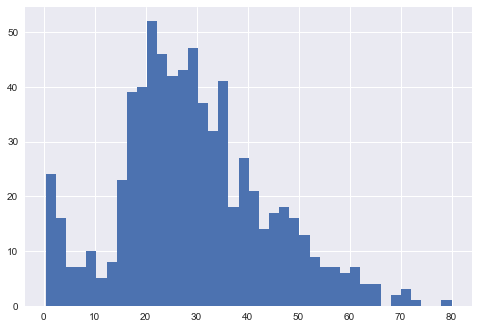

In [12]:
titanic['age'].hist(bins=40)

C:\Users\alvaromc317\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_bin : Removed 177 rows containing non-finite values.


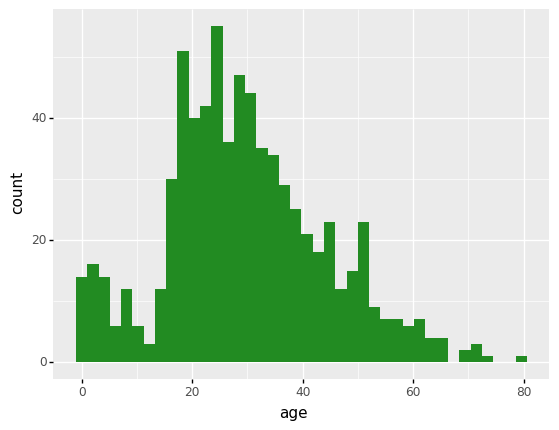

<ggplot: (97841965888)>

In [13]:
(ggplot(titanic, aes(x='age')) + geom_histogram(fill='forestgreen', bins=40))

__¿Cual era la edad del pasajero más anciano?, ¿y del más joven?. ¿Cual era la edad media?__

In [14]:
print('El más anciano:',titanic['age'].max(),'años')
print('El más joven:', titanic['age'].min(),'años')
print('La edad media:',np.round(titanic['age'].mean(), 2),'años')

El más anciano: 80.0 años
El más joven: 0.42 años
La edad media: 29.7 años


__¿Cómo se distribuyen los costes de los billetes?__

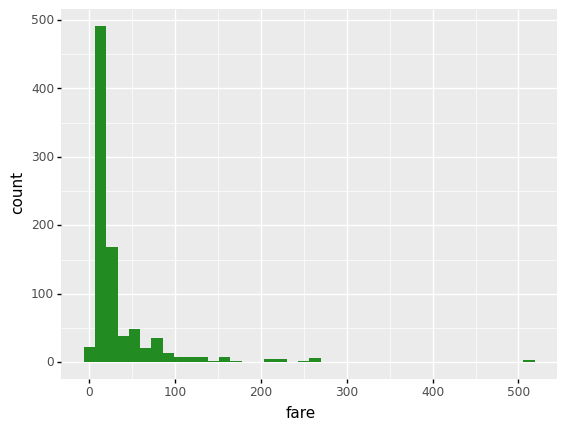

<ggplot: (97841969436)>

In [15]:
(ggplot(titanic, aes(x='fare')) + geom_histogram(fill='forestgreen', bins=40))

__¿Cuanta gente embarcó en cada puerto?__

In [16]:
titanic.groupby('embark_town')['embark_town'].count()

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: embark_town, dtype: int64

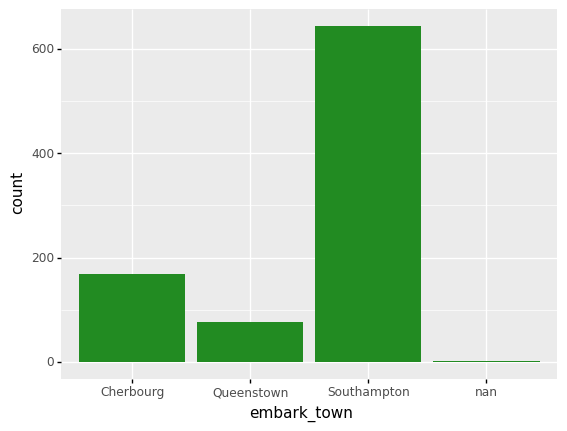

<ggplot: (97841972785)>

In [17]:
(ggplot(titanic, aes(x='embark_town')) + geom_bar(fill='forestgreen'))

__¿Cómo se relaciona la clase con la supervivencia?__

In [18]:
titanic.loc[:,['class', 'survived']].groupby('class').mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


<AxesSubplot:xlabel='class'>

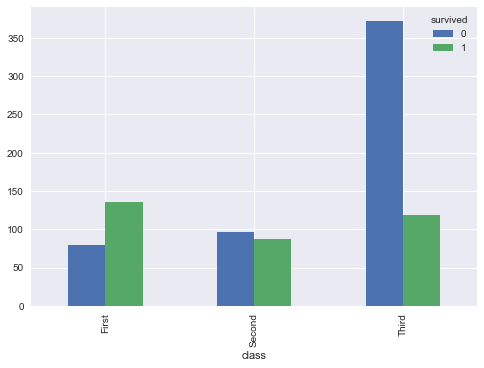

In [19]:
tabla = pd.crosstab(titanic['class'], titanic['survived'])
tabla.plot.bar()

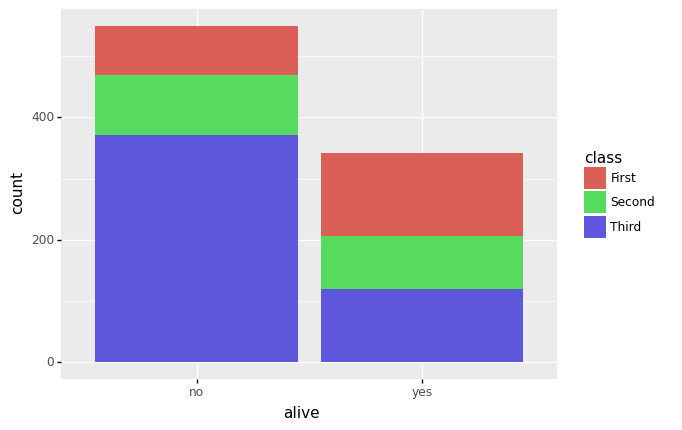

<ggplot: (97842065381)>

In [20]:
(ggplot(titanic, aes(x='alive')) + geom_bar(aes(fill='class')))

__¿Cómo se relaciona el sexo con la supervivencia?__

In [21]:
titanic.loc[:,['sex', 'survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


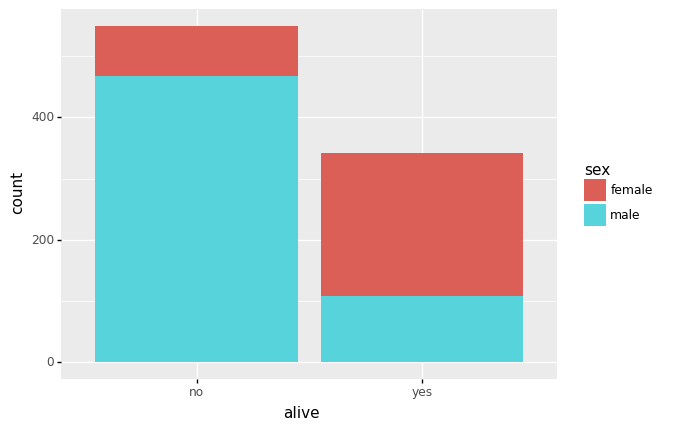

<ggplot: (97842086178)>

In [22]:
(ggplot(titanic, aes(x='alive')) + geom_bar(aes(fill='sex')))

__¿Cómo se distribuye la edad en función de la supervivencia?__

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

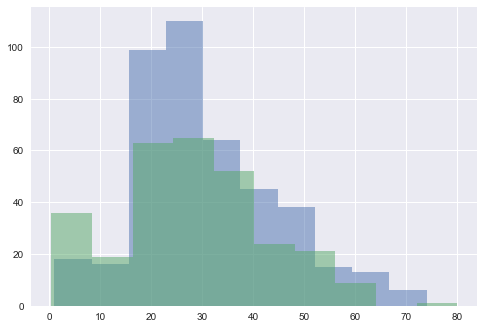

In [23]:
plt.hist(titanic.loc[titanic['alive'] == 'no', 'age'], alpha=0.5)
plt.hist(titanic.loc[titanic['alive'] == 'yes', 'age'], alpha=0.5)

__¿Cómo se distribuye la edad en función de la clase?__

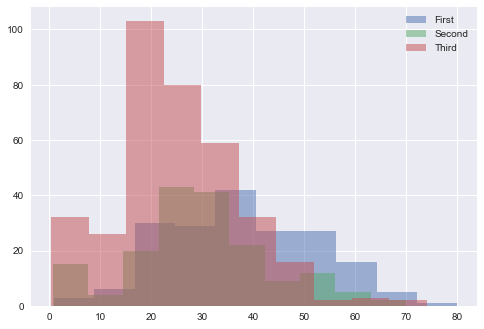

In [24]:
plt.hist(titanic.loc[titanic['class'] == 'First', 'age'], alpha=0.5, label='First')
plt.hist(titanic.loc[titanic['class'] == 'Second', 'age'], alpha=0.5, label='Second')
plt.hist(titanic.loc[titanic['class'] == 'Third', 'age'], alpha=0.5, label='Third')
plt.legend()

C:\Users\alvaromc317\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


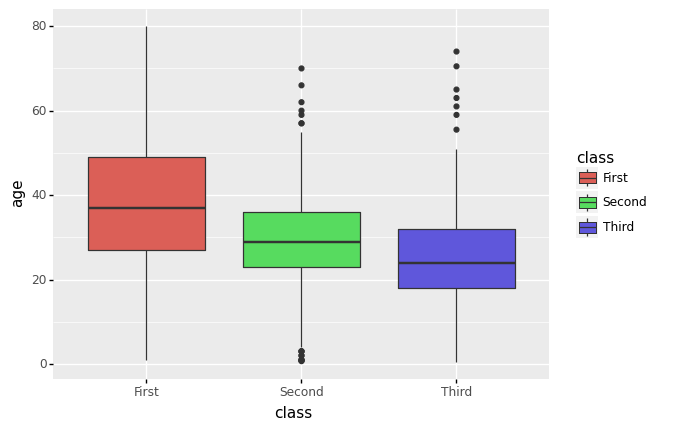

<ggplot: (97841860726)>

In [25]:
(ggplot(titanic, aes(x='class', y='age')) + geom_boxplot(aes(fill='class')))

__¿Cómo se relacionan el coste del billete y la edad?__

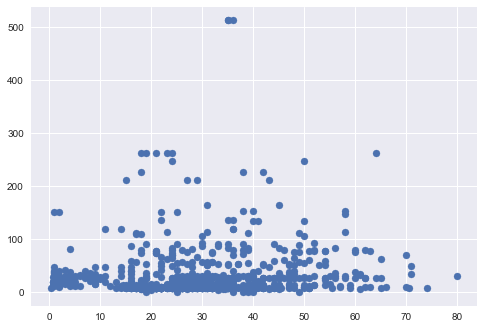

In [26]:
plt.scatter(x=titanic['age'], y=titanic['fare'])

__¿Está relacionado el puerto de embarque con la supervivencia?__

In [27]:
titanic.loc[:,['embark_town', 'survived']].groupby('embark_town').mean()

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


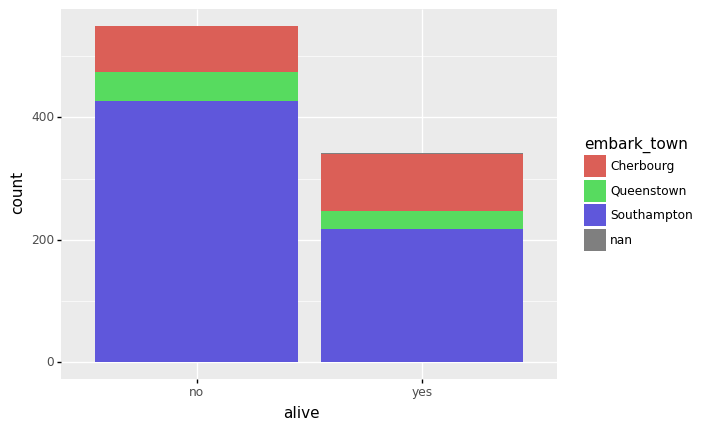

<ggplot: (97841948838)>

In [28]:
(ggplot(titanic, aes(x='alive')) + geom_bar(aes(fill='embark_town')))

__¿Está relacionado el puerto de embarque con la clase?__

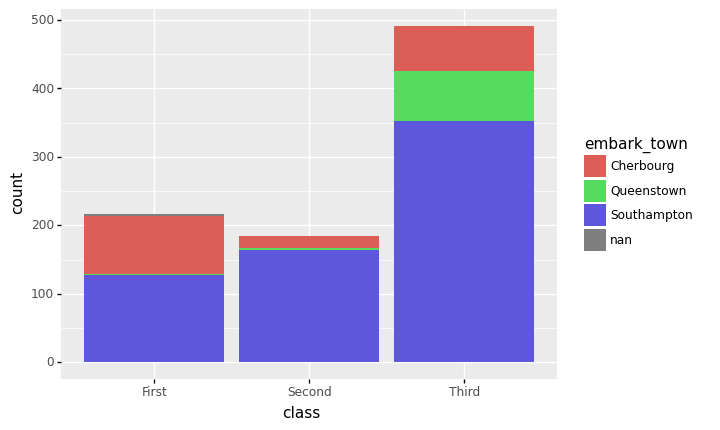

<ggplot: (97842151985)>

In [29]:
(ggplot(titanic, aes(x='class')) + geom_bar(aes(fill='embark_town')))

__Cómo se distribuye el coste de los billetes en función de la clase?__

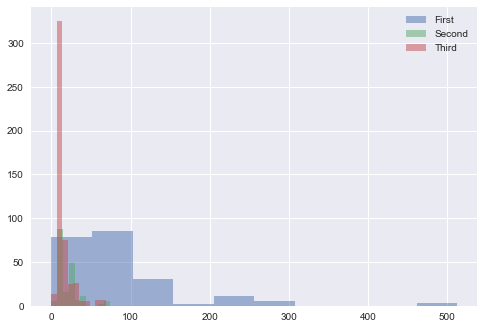

In [30]:
plt.hist(titanic.loc[titanic['class'] == 'First', 'fare'], alpha=0.5, label='First')
plt.hist(titanic.loc[titanic['class'] == 'Second', 'fare'], alpha=0.5, label='Second')
plt.hist(titanic.loc[titanic['class'] == 'Third', 'fare'], alpha=0.5, label='Third')
plt.legend()

__Por último, veamos la correlación entre las variables__

In [31]:
titanic.corr()

,survived,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


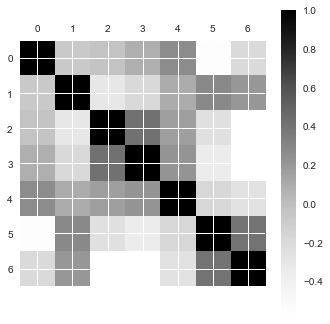

In [32]:
plt.matshow(titanic.corr())
plt.colorbar()